<a href="https://colab.research.google.com/github/SantiagoAlbarracin/TP3-SOA/blob/main/TP3_Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycuda

     |████████████████████████████████| 1.7MB 12.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627255 sha256=3721eaa801854fa746a58d96f95f2145e086ebcc4529952b7985c9682fa2ffb1
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.7-py2.py3-none-any.whl size=60644 sha256=2d3740969d5078dad1971ac7a19d75327f52d67af75bc930ba5a3729841b5afa
  Stored in directory: /root/.cache/pip/wheels/a0/b5/e5/e65d25997fd77729b9aa214645add18688483e48bbcbab6ffc
Successfully built pytools


In [ ]:
!pip install validators

In [ ]:
import validators

#@title Ingrese la url de una imagen:

url_imagen = "http://www.fm891.com.ar/wp-content/uploads/2018/04/logo_unlam.png" #@param {type: "string" }

if(url_imagen == "" or not validators.url(url_imagen)):
  raise TypeError("Debe ingresar la url de una imagen.")

!wget {url_imagen} -O imagen

--2021-06-24 19:05:30--  http://www.fm891.com.ar/wp-content/uploads/2018/04/logo_unlam.png
Resolving www.fm891.com.ar (www.fm891.com.ar)... 107.182.234.238
Connecting to www.fm891.com.ar (www.fm891.com.ar)|107.182.234.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23444 (23K) [image/png]
Saving to: ‘imagen’

imagen              100%[===================>]  22.89K  --.-KB/s    in 0.06s   

2021-06-24 19:05:31 (388 KB/s) - ‘imagen’ saved [23444/23444]



Alto de imagen  280  Ancho  280


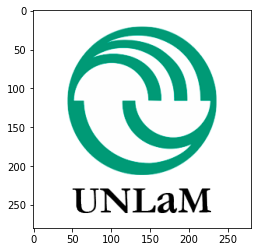

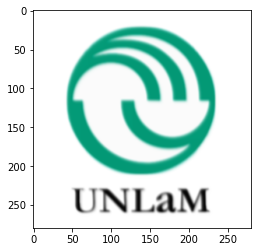

In [66]:
from datetime import datetime
import numpy as npy
import matplotlib.pyplot as plt
from PIL import Image


def tiene_pixel_izquierda(indice_x, width):
  if indice_x <= 0:
    return False
  return True

def tiene_pixel_derecha(indice_x, width):
  if indice_x >= width:
    return False
  return True

def tiene_pixel_arriba(indice_y, height):
  if indice_y <= 0:
    return False
  return True

def tiene_pixel_abajo(indice_y, height):
  if indice_y >= height:
    return False
  return True

def low_pass_filter(array_imagen_cpu, x, y, imagen_width, imagen_height, suma_pixel, array_imagen_resultado_cpu):
    suma_pixel = (array_imagen_cpu[x][y]) / 9
    if tiene_pixel_arriba(y, imagen_height):
     suma_pixel = ( array_imagen_cpu[x][y-1] ) / 9 + suma_pixel 

    if tiene_pixel_arriba(y, imagen_height) and tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y-1] ) / 9 + suma_pixel 

    if tiene_pixel_arriba(y, imagen_height) and tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y] ) / 9 + suma_pixel 

    if tiene_pixel_abajo(y, imagen_height):
     suma_pixel = ( array_imagen_cpu[x][y+1] ) / 9 + suma_pixel    

    if tiene_pixel_abajo(y, imagen_height) and tiene_pixel_izquierda(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x-1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_abajo(y, imagen_height) and tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y+1] ) / 9 + suma_pixel 

    if tiene_pixel_derecha(x, imagen_width):
     suma_pixel = ( array_imagen_cpu[x+1][y] ) / 9 + suma_pixel 

    array_imagen_resultado_cpu[x][y] = suma_pixel




#@title Cantidad de pasadas

cant_pasadas =  3#@param {type: "number" }

if cant_pasadas <= 0:
    raise TypeError("Debe ingresar un numero mayor a 0.")

imagen = Image.open('imagen')

imagen_height, imagen_width = imagen.size
cantidad_pixeles = imagen_height * imagen_width

print("Alto de imagen ", imagen_height, " Ancho ", imagen_width)

array_imagen_cpu = npy.asarray(imagen)
array_imagen_resultado_cpu = array_imagen_cpu.copy()

plt.figure()
imgplot=plt.imshow( array_imagen_cpu )

while cant_pasadas > 0:
  for y in range( 0, imagen_height - 1 ):
    for x in range( 0, imagen_width - 1 ):
      low_pass_filter(array_imagen_resultado_cpu, x, y, imagen_width, imagen_height, suma_pixel, array_imagen_resultado_cpu)
  cant_pasadas = cant_pasadas - 1   


plt.figure()
imgplot=plt.imshow( array_imagen_resultado_cpu )





